# TensorFlow Lab 

## First model Linear regression

### Configuration code

In [16]:
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


import tensorflow as tf




## Create random dataset
### Simple random linear dataset
### $y = \theta_0 + \theta_1 * x + noise$
### $noise = \mathcal{N}(0,20)$


In [12]:
# create dataset
noise = np.random.normal(0, 20, 100)
X = np.random.randint(0, high=50, size=100)
init_theta0 = 3
initial_theta1 = 4
Y = initial_theta0 + initial_theta1*X + noise

print Y


[ 164.00985701  185.92896419  -10.60049443   67.64507394  160.86144947
    4.71297164  124.31549022  124.47665842  -12.82606994   60.13107217
   83.5063666    78.74169207  170.17191158   70.58635363  134.26752258
   63.25561854  127.4412032    56.93585965  182.09223768  179.92527671
  101.20971141  166.6837943    17.45796581   53.8230395    68.53381599
  119.54366498  103.26003784  220.07068154   77.70686334  209.40338333
  155.51334696  113.85684887   97.58215004  156.6494483    86.53074429
   53.28000988   28.46475249  141.54342175  118.06412564   92.70305551
   30.06970096   92.12797589  131.28187488  -21.91477557   22.46361852
  186.70634759   -2.67714872   66.07450212   96.16417437   40.14059404
   14.15574721  206.21569053  132.66102486  148.07604104   79.44661264
   60.2434992   105.30070534   57.27571902  209.30095373  216.05462981
  142.41781021  153.7113128   190.08003527  160.02782503   40.69461511
   26.17938441  -12.45650429  126.26362787  149.29272904   40.63748279
  217.

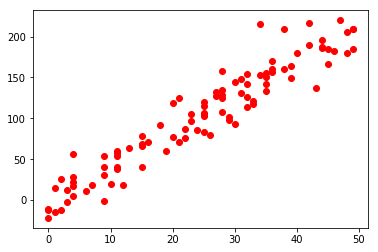

In [13]:
plt.plot(X,Y,"ro")

## 1- Start with tf.learn API 

In [39]:
#Define input feature columns
feature_columns = [tf.contrib.layers.real_valued_column("x_")]
 
#Instantiate Linear Regression Model 
estimator = tf.contrib.learn.LinearRegressor(feature_columns=feature_columns)

#Train input function
def input_fn_train(x,y):
    feature_data = {"x_": tf.constant(x)} 
    label_data = tf.constant(y)
    return feature_data, label_data

estimator.fit(input_fn=lambda: input_fn_train(X,Y), steps=100)

#Predict input fucntion
def input_fn_pred():
    feature_data = {"x_": tf.constant([20,50])}
    return feature_data 
list(estimator.predict(input_fn=input_fn_pred))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f7f8c190790>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpQFST7V/model

[61.439739, 149.24231]

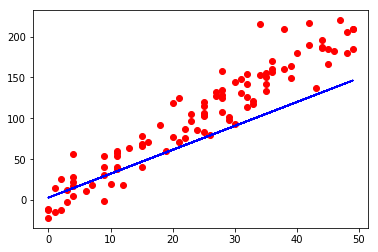

In [41]:
# Get model parameter

tetha0 = estimator.get_variable_value("linear/bias_weight")[0]
tetha1 = estimator.get_variable_value("linear/x_/weight")[0][0]

#Plot Data
plt.plot(X,Y,"ro")

#plot model 
X_axis=np.linspace(0, 50, 1000)
plt.plot(X, tetha0 + tetha1 *X, "b")


## 2- Normal equation
### Normal equation can resolve linear regression problem
### $optimumParameter = (X^T.X)^1.X^T.Y$
### Where X is a parameter matrix and Y is the corresponding result matrix


In [29]:
# For normal equation we add bias column into our data in order to simulate the theta0 parameter
X_bias = np.c_[np.ones((X.shape[0], 1)), X]


In [31]:
# Clean workspace
tf.reset_default_graph()

# Create our node in Tensorflow
X_normal = tf.constant(X_bias, dtype=tf.float64, name="X_normal")
y_normal = tf.constant(Y.reshape(-1, 1), dtype=tf.float64, name="y_normal")
XT = tf.transpose(X_normal)

# Create graph to compute Normal Equation
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X_normal)), XT), y_normal)

# Launch graph and get result
with tf.Session() as sess:
    result = theta.eval()

print(result)




[[-2.89918954]
 [ 4.33885992]]


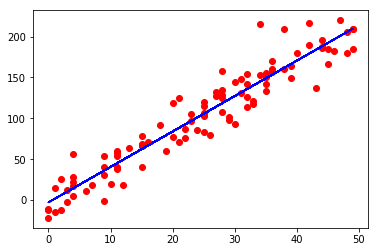

In [35]:
# Get model parameter

tetha0_normal = result[0]
tetha1_normal = result[1]

#Plot Data
plt.plot(X,Y,"ro")

#plot model 
X_axis=np.linspace(0, 50, 1000)
plt.plot(X, tetha0_normal + tetha1_normal *X, "b")
